### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tune_scan_start_of_collapse_round"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


,,,name base collider,normalized amplitude in xy-plane,qx,qy,dqx,dqy,i_bunch_b1,i_bunch_b2,i_oct_b1,i_oct_b2,num_particles_per_bunch,crossing_angle
beam,qx,qy,,,,,,,,,,,,
lhcb1,62.325,60.329,base_collider,6.906,62.325,60.329,15.0,15.0,150.0,147.0,-300.0,-300.0,2.200000e+11,250.0


In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.325
qy,
60.329,6.906


In [4]:
import numpy as np
array_qx = np.round(np.arange(62.305, 62.330, 0.001), decimals=4)
array_qy = np.round(np.arange(60.305, 60.330, 0.001), decimals=4)

# Replace NaNs above the upper diagonal with 8
for qx in array_qx:
    for qy in array_qy:
        if qy >= qx - 2 + 0.004:
            if qx in df_to_plot.columns and qy in df_to_plot.index:
                if pd.isna(df_to_plot.loc[qy, qx]):
                    df_to_plot.loc[qy, qx] = 8
            else:
                df_to_plot.loc[qy, qx] = 8
                
# Sort indices by increasing qy
df_to_plot = df_to_plot.sort_index(ascending=True)

# Sort columns by increasing qx
df_to_plot = df_to_plot.sort_index(axis=1, ascending=True)

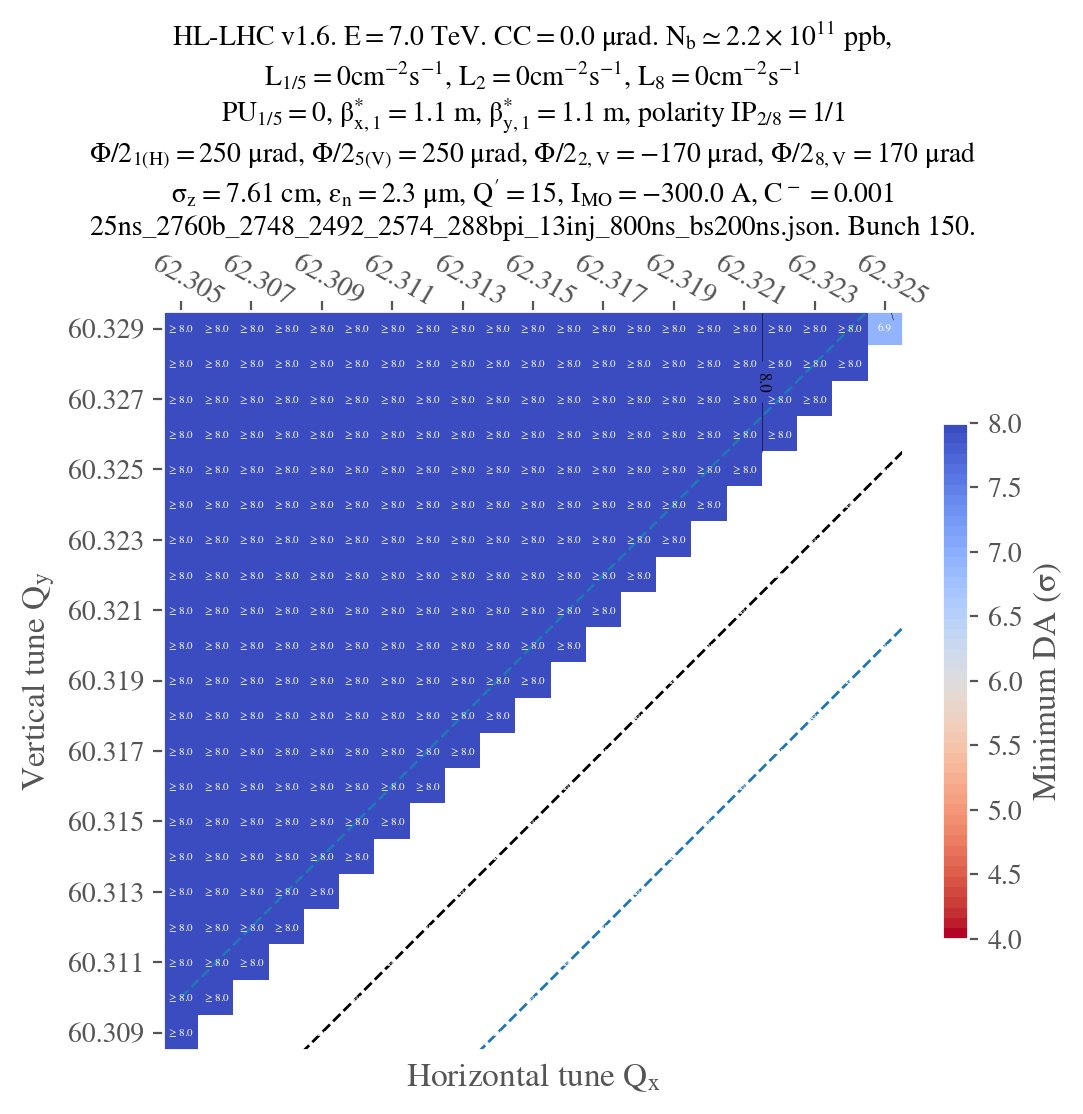

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flathv",
    betx=1.1,
    bety=1.1,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
